## Simple Beginner kernel using logistic regression

If anyone is having this project as their first project , i highly recommend to go through my other kernel and upvote if you like , and feel free to ask any questions in comment section :)

https://www.kaggle.com/iluvmahheart/simple-beginner-titanic-survival-prediction

### Imports

In [127]:
import pandas as pd 
import numpy as np

In [128]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")

In [129]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
train.drop(['Name'],axis=1,inplace=True)

In [131]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [133]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [134]:
sample_sub=pd.read_csv("../input/gender_submission.csv")

In [135]:
sample_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [136]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [138]:
test.drop(['Name'],axis=1,inplace=True)

In [139]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


### Checking for null values

In [140]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [142]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Dropping columns with too much null values and non required data

In [143]:
train.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)
train.drop(['Ticket'],axis=1,inplace=True)
train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)

In [144]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [145]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Visualization

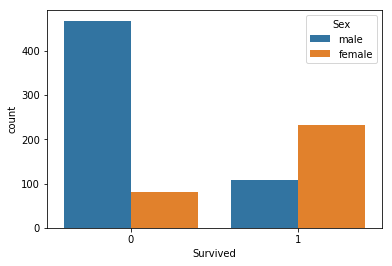

In [146]:
import seaborn as sns
sns.countplot(x='Survived',hue='Sex',data=train)

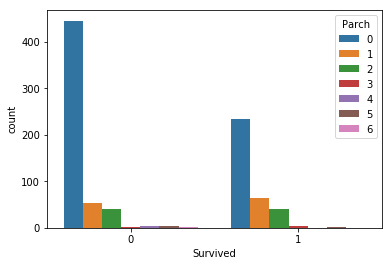

In [147]:
sns.countplot(x='Survived',hue='Parch',data=train)

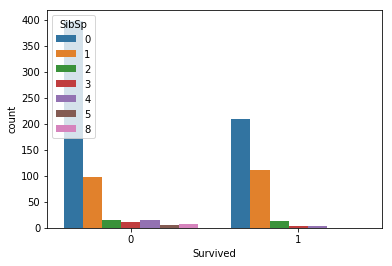

In [148]:
sns.countplot(x='Survived',hue='SibSp',data=train)

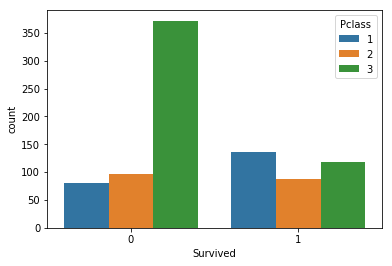

In [149]:
sns.countplot(x='Survived',hue='Pclass',data=train)

### transformation

In [150]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [151]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [152]:
train['Age'].mean()

29.69911764705882

### Replacing null values by mean of the vaues of column data

In [153]:
train['Age'].fillna((train['Age'].mean()), inplace=True)

In [154]:
test['Age'].fillna((test['Age'].mean()), inplace=True)

In [155]:
test['Fare'].fillna((test['Fare'].mean()), inplace=True)

#### Dropping null values from train

In [156]:
train.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [157]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [158]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [159]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [160]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Transforming instead of skewing

In [161]:
Pclass=pd.get_dummies(train['Pclass'],drop_first=True)
Pclass1=pd.get_dummies(test['Pclass'],drop_first=True)
Sex=pd.get_dummies(train['Sex'],drop_first=True)
Sex1=pd.get_dummies(test['Sex'],drop_first=True)
Embarked=pd.get_dummies(train['Embarked'],drop_first=True)
Embarked1=pd.get_dummies(test['Embarked'],drop_first=True)

### Joining newly created dummy data columns 

In [162]:
train=pd.concat([train,Pclass,Sex,Embarked],axis=1)
test=pd.concat([test,Pclass1,Sex1,Embarked1],axis=1)

### Dropping old columns

In [163]:
train.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)

In [164]:
train.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [165]:
test.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [166]:
sample_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### Separating X and y

In [167]:
y=train['Survived']

In [168]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [169]:
X=train.drop('Survived',axis=1)

In [170]:
X.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


## Creating Neural Network

In [171]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.fit_transform(test)

In [172]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [173]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_35 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_36 (Dense)             (None, 5)                 50        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 6         
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [175]:
model.fit(X, y, batch_size = 32, nb_epoch = 100)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
891/891 [==============================] - 1s 679us/step - loss: 0.6920 - acc: 0.6049
Epoch 2/100
891/891 [==============================] - 0s 72us/step - loss: 0.6893 - acc: 0.6162
Epoch 3/100
891/891 [==============================] - 0s 54us/step - loss: 0.6838 - acc: 0.6162
Epoch 4/100
891/891 [==============================] - 0s 51us/step - loss: 0.6710 - acc: 0.6162
Epoch 5/100
891/891 [==============================] - 0s 51us/step - loss: 0.6430 - acc: 0.6162
Epoch 6/100
891/891 [==============================] - 0s 57us/step - loss: 0.5963 - acc: 0.7273
Epoch 7/100
891/891 [==============================] - 0s 53us/step - loss: 0.5454 - acc: 0.8114
Epoch 8/100
891/891 [==============================] - 0s 53us/step - loss: 0.5058 - acc: 0.8126
Epoch 9/100
891/891 [==============================] - 0s 54us/step - loss: 0.4788 - acc: 0.8092
Epoch 10/100
891/891 [==============================] - 0s 57us/step - loss: 0.4596 - acc: 0.8137
Epoch 11/100
891/891 [======

891/891 [==============================] - 0s 52us/step - loss: 0.4024 - acc: 0.8339
Epoch 85/100
891/891 [==============================] - 0s 53us/step - loss: 0.4024 - acc: 0.8339
Epoch 86/100
891/891 [==============================] - 0s 56us/step - loss: 0.4024 - acc: 0.8339
Epoch 87/100
891/891 [==============================] - 0s 52us/step - loss: 0.4020 - acc: 0.8339
Epoch 88/100
891/891 [==============================] - 0s 53us/step - loss: 0.4027 - acc: 0.8350
Epoch 89/100
891/891 [==============================] - 0s 54us/step - loss: 0.4018 - acc: 0.8305
Epoch 90/100
891/891 [==============================] - 0s 55us/step - loss: 0.4017 - acc: 0.8316
Epoch 91/100
891/891 [==============================] - 0s 54us/step - loss: 0.4015 - acc: 0.8328
Epoch 92/100
891/891 [==============================] - 0s 52us/step - loss: 0.4023 - acc: 0.8328
Epoch 93/100
891/891 [==============================] - 0s 52us/step - loss: 0.4016 - acc: 0.8384
Epoch 94/100
891/891 [===========

## Predicting 

In [176]:
y_pred = model.predict(test)
y_final = (y_pred > 0.5).astype(int).reshape(test.shape[0])

In [177]:
sample_sub['Survived']= y_final
sample_sub.to_csv("submit.csv", index=False)
sample_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### Please comment how to improve the accuracy i am new 